In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [16]:
data = pd.read_csv('/Users/soroushesnaashari/Documents/Preparing/AA - Country Data/Country-data.csv', encoding='unicode_escape')
data

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


# PreProcessing

In [17]:
data_features = data.drop(columns=['country'])

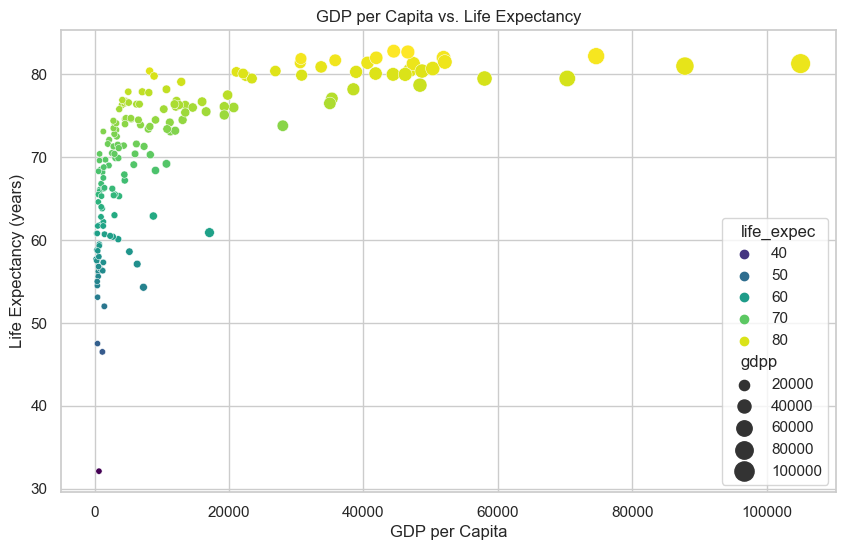

In [18]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data_features['gdpp'], y=data_features['life_expec'], hue=data_features['life_expec'], palette='viridis', size=data_features['gdpp'], sizes=(20, 200))
plt.title('GDP per Capita vs. Life Expectancy')
plt.xlabel('GDP per Capita')
plt.ylabel('Life Expectancy (years)')
plt.grid(True)
plt.show()

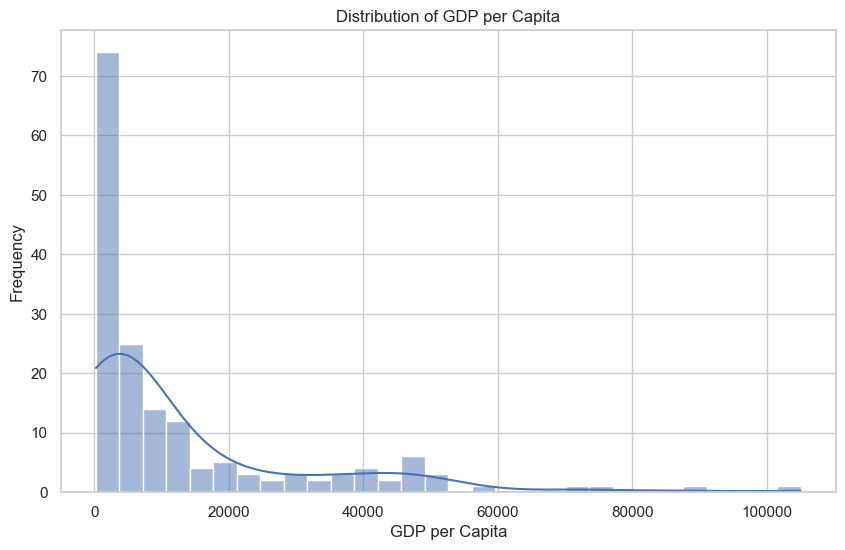

In [19]:
sns.set(style='whitegrid')
plt.figure(figsize=(10, 6))
sns.histplot(data_features['gdpp'], bins=30, kde=True)
plt.title('Distribution of GDP per Capita')
plt.xlabel('GDP per Capita')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

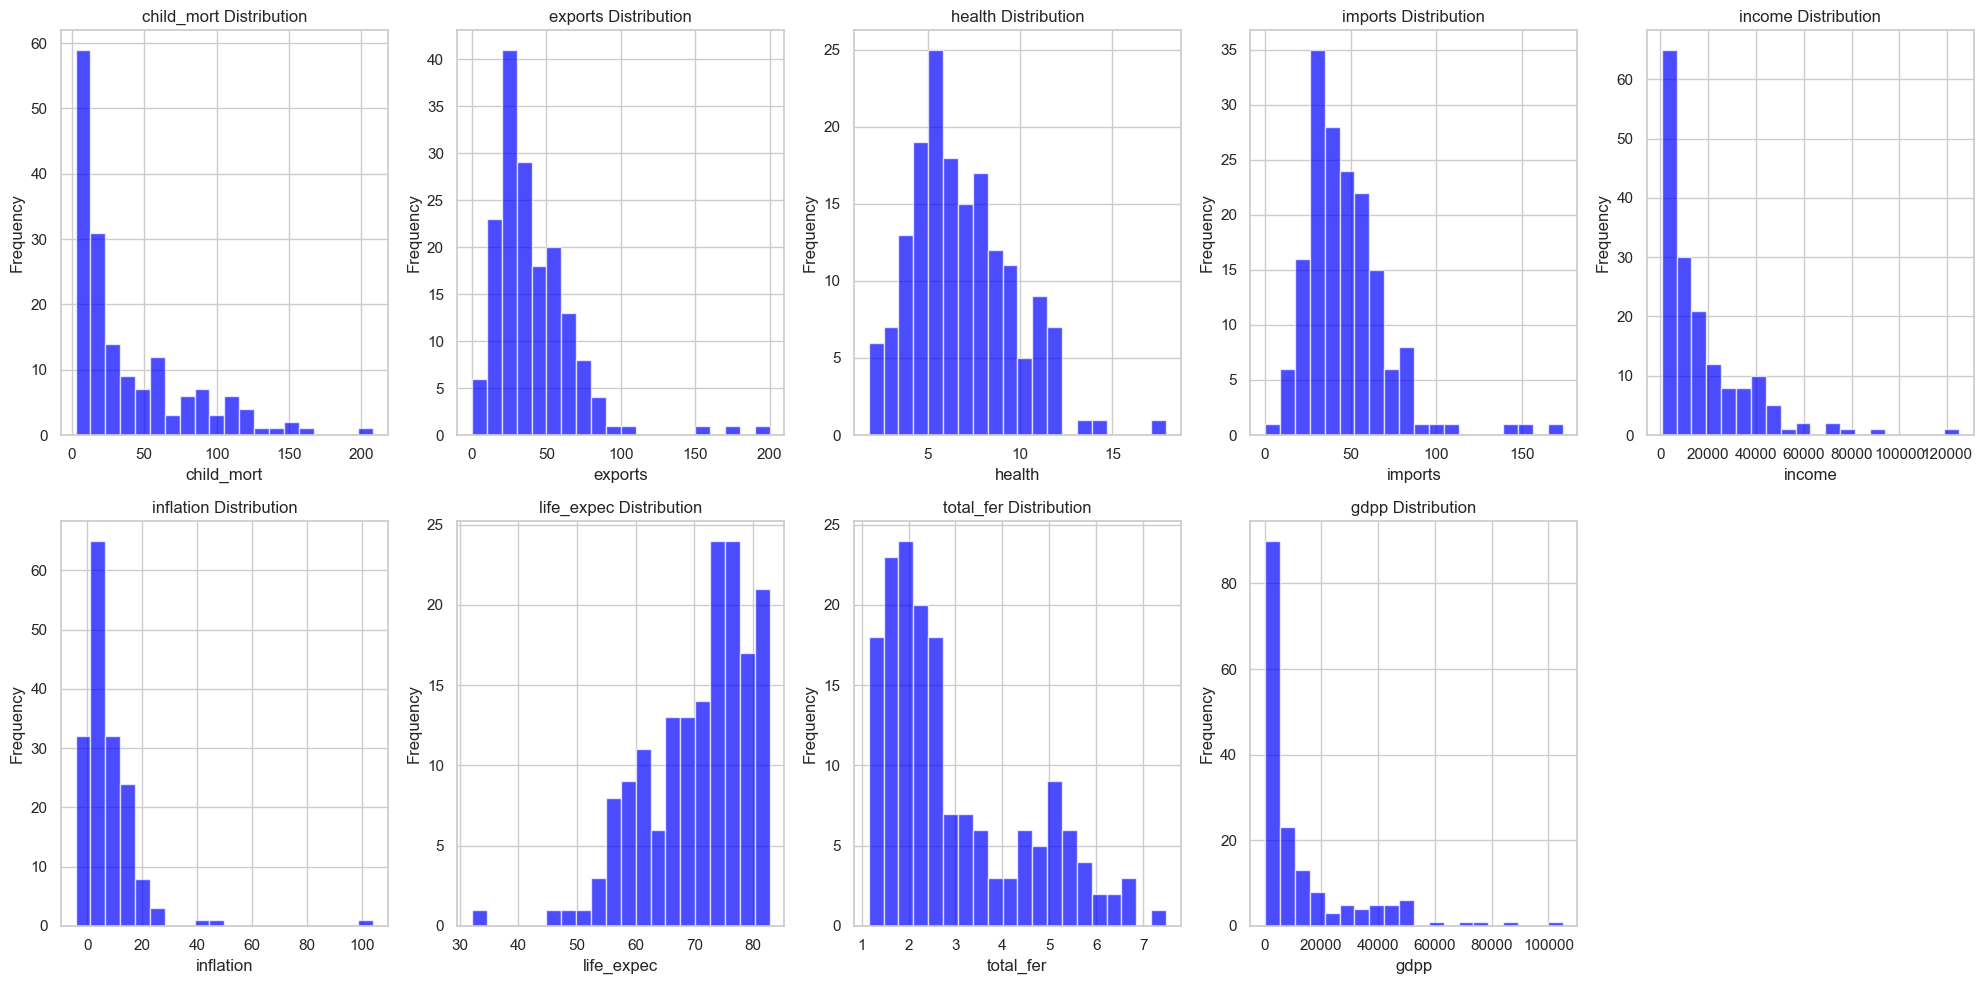

In [20]:
plt.figure(figsize=(20, 10))

for i, column in enumerate(data_features.columns, 1):
    plt.subplot(2, 5, i)
    plt.hist(data_features[column], bins=20, color='blue', alpha=0.7)
    plt.title(f"{column} Distribution")
    plt.xlabel(column)
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

In [21]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_features)

<hr>
Scaling the data using StandardScaler. If you want to find out about when you need to use which scaler, you can read my articles using the links below:

1. StandardScaler vs MinMaxScaler:<br>
https://medium.com/towards-artificial-intelligence/data-scaling-101-standardscaler-vs-minmaxscaler-e8f78d77283f
<br>

2. Exploring RobustScaler, MaxAbsScaler and Other Scaling Methods:<br>
https://medium.datadriveninvestor.com/data-scaling-102-beyond-the-basics-exploring-robustscaler-maxabsscaler-and-other-scaling-methods-383dd2921f69
<hr>

In [22]:
scaled_df = pd.DataFrame(data_scaled, columns=data_features.columns)

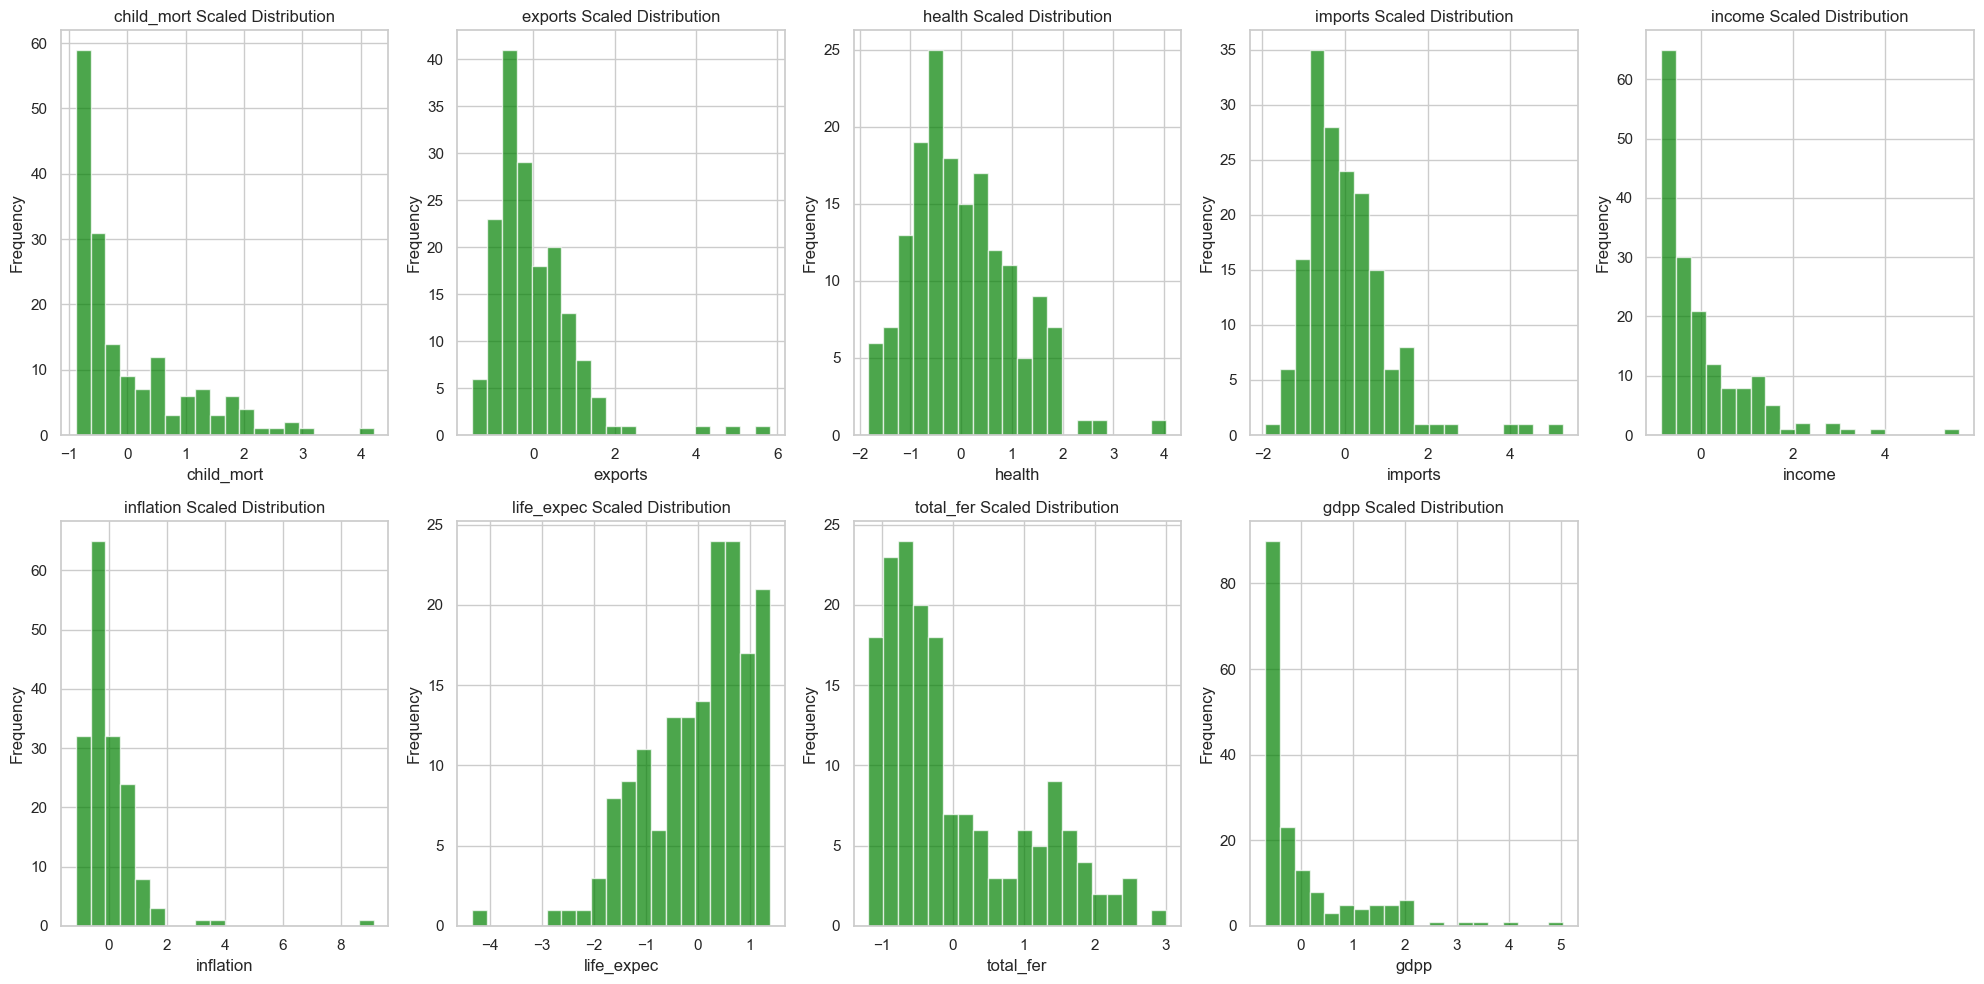

In [23]:
plt.figure(figsize=(20, 10))

for i, column in enumerate(scaled_df.columns, 1):
    plt.subplot(2, 5, i)
    plt.hist(scaled_df[column], bins=20, color='green', alpha=0.7)
    plt.title(f"{column} Scaled Distribution")
    plt.xlabel(column)
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

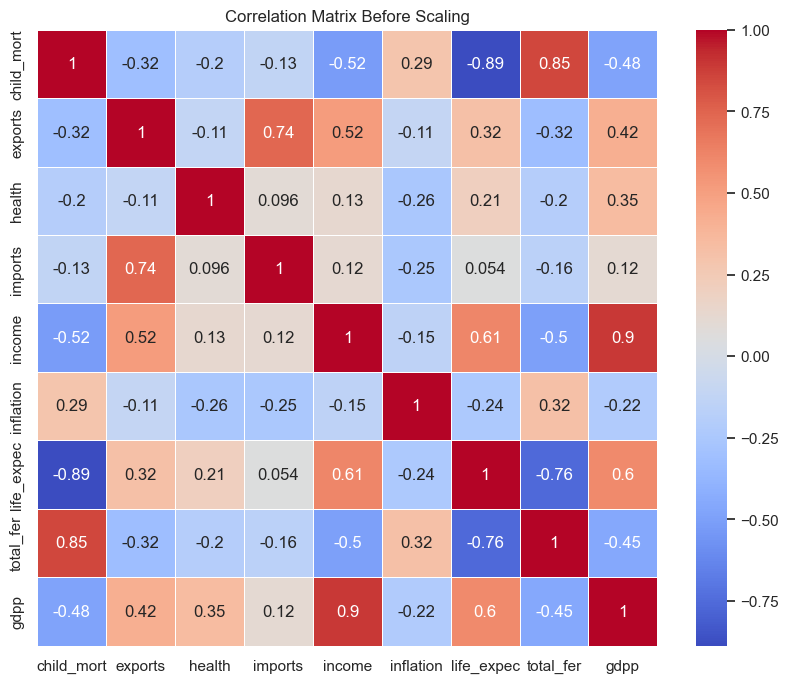

In [24]:
plt.figure(figsize=(10, 8))
correlation_matrix = data_features.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Before Scaling')
plt.show()

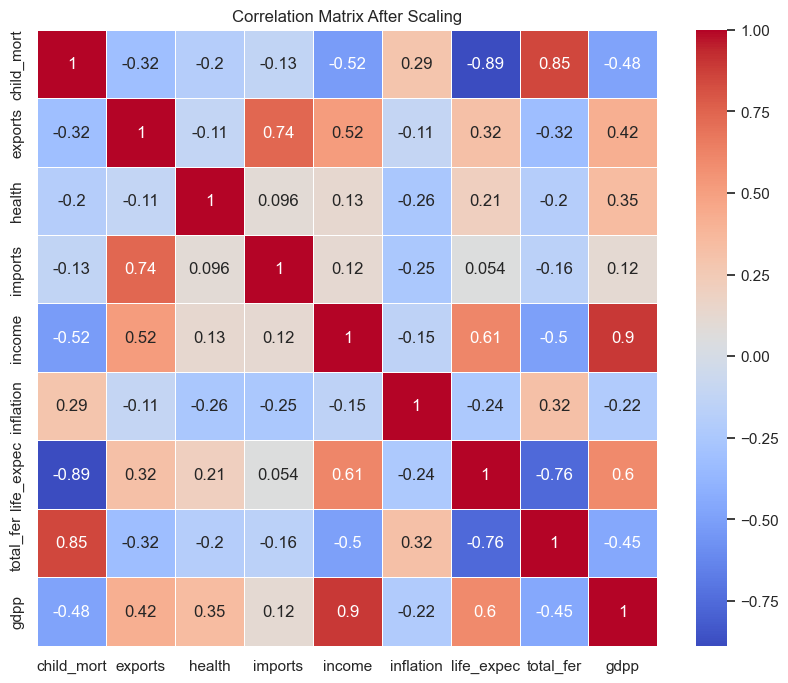

In [25]:
plt.figure(figsize=(10, 8))
correlation_matrix = scaled_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix After Scaling')
plt.show()

# Modeling

In [26]:
pca = PCA()
pca_result = pca.fit_transform(data_scaled)

In [27]:
# Determine explained variance
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

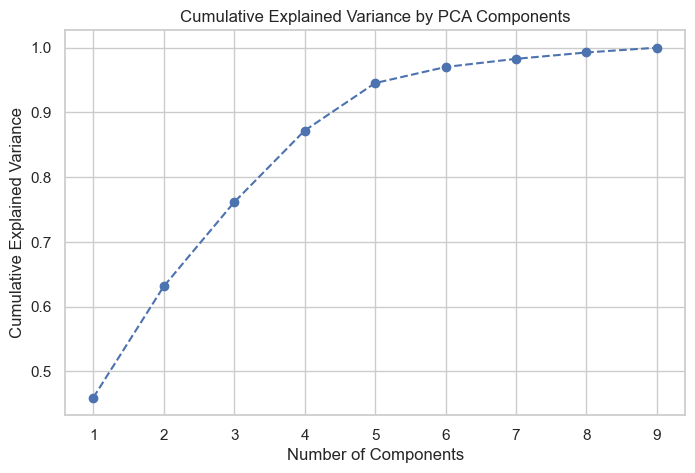

In [28]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

In [33]:
from sklearn.metrics import mean_squared_error

reconstructed_data = pca.inverse_transform(pca_result)
reconstruction_error = mean_squared_error(data_scaled, reconstructed_data)
print(f"Reconstruction Error (MSE): {reconstruction_error:.4f}")

Reconstruction Error (MSE): 0.0000


It is not quite accurate to have 0 for MSE

In [29]:
pca_2d = PCA(n_components=2)
result_2d = pca_2d.fit_transform(data_scaled)

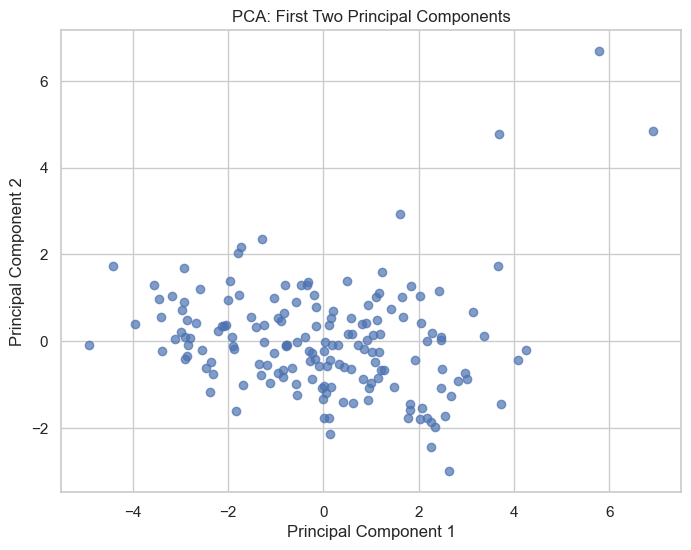

In [30]:
plt.figure(figsize=(8, 6))
plt.scatter(result_2d[:, 0], result_2d[:, 1], alpha=0.7, edgecolors='b')
plt.title('PCA: First Two Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

In [34]:
n_components = np.argmax(cumulative_variance >= 0.95) + 1
print(f"Number of components to retain 95% variance: {n_components}")

Number of components to retain 95% variance: 6


In [35]:
pca_reduced = PCA(n_components=n_components)
pca_result_reduced = pca_reduced.fit_transform(data_scaled)

In [36]:
reconstructed_data_reduced = pca_reduced.inverse_transform(pca_result_reduced)
reconstruction_error_reduced = mean_squared_error(data_scaled, reconstructed_data_reduced)
print(f"Reconstruction Error (MSE) with {n_components} components: {reconstruction_error_reduced:.4f}")

Reconstruction Error (MSE) with 6 components: 0.0298
